In [1]:
import numpy as np 
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC
# HOG
import json
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from subprocess import check_output

print(os.listdir("E:/kaggle/fruit-360/"))
dim = 100

['.git', 'fruit-classification-pca-svm-knn-decision-tree.ipynb', 'Fruit-Images-Dataset', 'test', 'train', 'training-svm-classifier-with-hog-features.ipynb']


In [2]:
def GetFruit(fruitlist,datatype,print_n=False,k_fold=False):
    images=[]
    labels=[]
    val=['train','test']
    if not k_fold:
        PATH="E:/kaggle/fruit-360/"+datatype+"/"
        for i,fruit in enumerate(fruitlist):
            p=PATH+fruit
            j=0
            for image_path in glob.glob(os.path.join(p,"*.jpg")):
                image=cv2.imread(image_path,cv2.IMREAD_COLOR)
                image=cv2.resize(image,(dim,dim))
                image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are",j,"",datatype.upper()," images of ",fruitlist[i].upper())
        images=np.array(images)
        labels=np.array(labels)
        return images,labels
    else:
        for v in val:
            PATH="E:/kaggle/fruit-360/"+v+"/"
            for i,fruit in enumerate(fruitlist):
                p=PATH+fruit
                j=0
                for image_path in glob.glob(os.path.join(p,"*.jpg")):
                    image=cv2.imread(image_path,cv2.IMREAD_COLOR)
                    image=cv2.resize(image,(dim,dim))
                    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
            images=np.array(images)
            labels=np.array(labels)
            return images,labels

def GetAll():
    fruitlist=[]
    for fruit_path in glob.glob("E:/kaggle/fruit-360/train/*"):
        fruit=frui_path.split("/")[-1]
        fruitlist.append(fruit)
    return fruits

In [4]:
def getClassNumber(y):
    v =[]
    i=0
    count = 0
    for index in y:
        if(index == i):
            count +=1
        else:
            v.append(count)
            count = 1
            i +=1
    v.append(count)        
    return v

def plotPrincipalComponents(X, dim):
    v = getClassNumber(y_train)
    colors = 'orange', 'purple', 'r', 'c', 'm', 'y', 'k', 'grey', 'b', 'g'
    markers = ['o', 'x' , 'v', 'd']
    tot = len(X)
    start = 0 
    if(dim == 2):
        for i,index in enumerate(v):
            end = start + index
            plt.scatter(X[start:end,0],X[start:end,1] , color=colors[i%len(colors)], marker=markers[i%len(markers)], label = fruitlist[i])
            start = end
        plt.xlabel('PC1')
        plt.ylabel('PC2')
    
    if(dim == 3):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for i,index in enumerate(v):
            end = start + index
            ax.scatter(X[start:end,0], X[start:end,1], X[start:end,2], color=colors[i%len(colors)], marker=markers[i%len(markers)], label = fruitlist[i])
            start = end
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')


    plt.legend(loc='lower left')
    plt.xticks()
    plt.yticks()
    plt.show()

# 绘制混淆矩阵
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=fruitlist, yticklabels=fruitlist,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

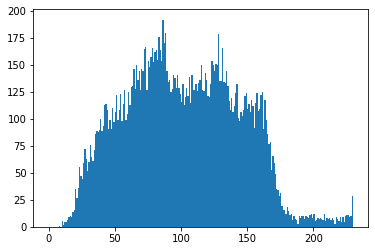

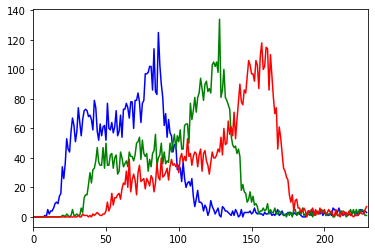

In [5]:
sample = cv2.imread("E:/kaggle/fruit-360/train/Kiwi/0_100.jpg",cv2.IMREAD_COLOR)
plt.hist(sample.ravel(), bins=230, range=[0, 230]);
plt.show()
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([sample], [i], None, [230], [0, 230])
    plt.plot(histr, color=col)
plt.xlim([0, 230])
plt.show()

In [23]:
# Binary classification
fruitlist=['Pineapple','kiwi']
# Get image and Labels
X_train_raw,y_train=GetFruit(fruitlist,'train',print_n=True,k_fold=False)
X_test_raw,y_test=GetFruit(fruitlist,'test',print_n=True,k_fold=False)
# Get data for k-fold
X_raw,y=GetFruit(fruitlist,'',print_n=True,k_fold=True)

from skimage import feature
ppc=16
hog_features_train = []
hog_features_test = []
hog_images_train= []
hog_images_test=[]
for image in X_train_raw:
    fd,hog_image = feature.hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images_train.append(hog_image)
    hog_features_train.append(fd)
for image in X_test_raw:
    fd,hog_image = feature.hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images_test.append(hog_image)
    hog_features_test.append(fd)

# Scale data Images
scaler=StandardScaler()
X_train=scaler.fit_transform([i.flatten() for i in X_train_raw])
X_test=scaler.fit_transform([i.flatten() for i in X_test_raw])
X_train_hog=scaler.fit_transform([i.flatten() for i in hog_images_train])
X_test_hog=scaler.fit_transform([i.flatten() for i in hog_images_test])
X=scaler.fit_transform([i.flatten() for i in X_raw])

There are 490  TRAIN  images of  PINEAPPLE
There are 466  TRAIN  images of  KIWI
There are 166  TEST  images of  PINEAPPLE
There are 156  TEST  images of  KIWI


In [24]:
print("Shape of the data:")
print((X_train.shape,y_train.shape))
print((X_test.shape,y_test.shape))
print(X_train_hog.shape)
print(X_test_hog.shape)

print("\nData sample:")
print((X_train[0],y_train[0]))
print((X_train_hog[0],y_train[0]))
# x中是数据，每张图片由100*100像素，3条RGB通道构成，一共是30000维的向量构成
# y中是预测结果，二分类中被编码为0和1

Shape of the data:
((956, 30000), (956,))
((322, 30000), (322,))
(956, 10000)
(322, 10000)

Data sample:
(array([-1.35474176,  0.24001185,  0.26975539, ...,  0.        ,
        0.        ,  0.        ]), 0)
(array([0., 0., 0., ..., 0., 0., 0.]), 0)


['Pineapple', 'kiwi']


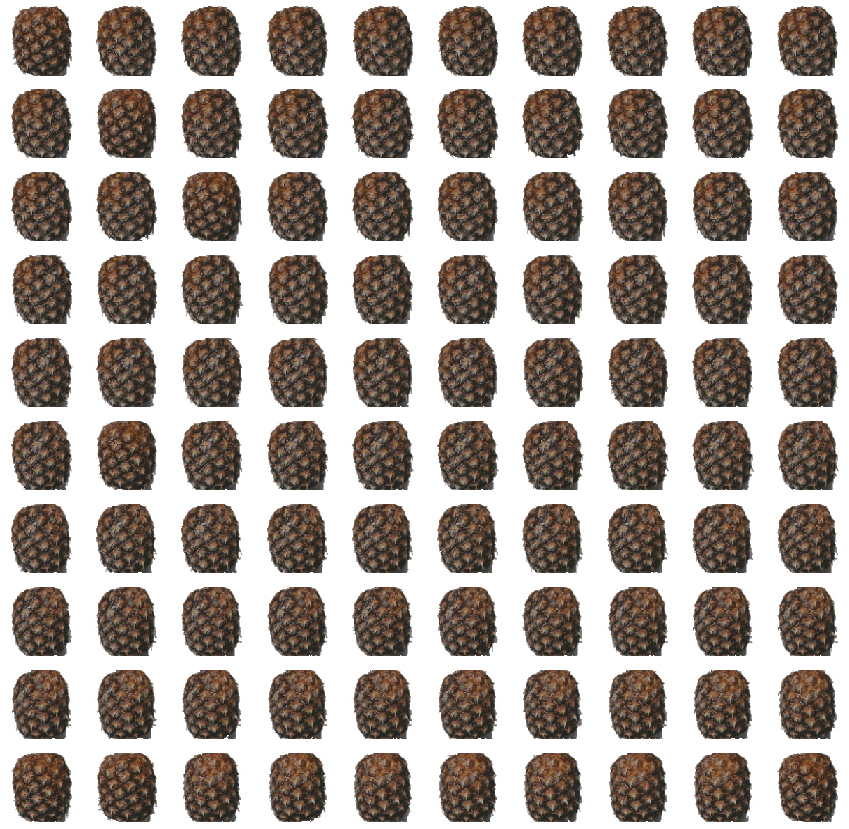

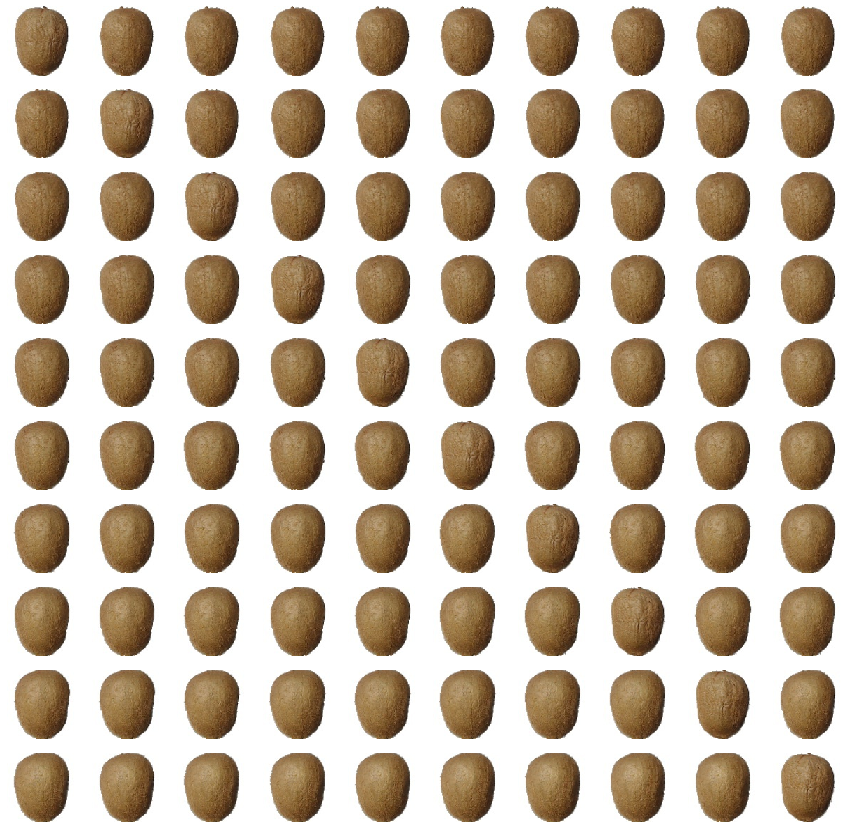

In [25]:
# 查看数据样例
def plot_image_grid(images, nb_rows, nb_cols, figsize=(15, 15)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1
            
print(fruitlist)
plot_image_grid(X_train_raw[0:100], 10, 10)
plot_image_grid(X_train_raw[490:590], 10, 10)

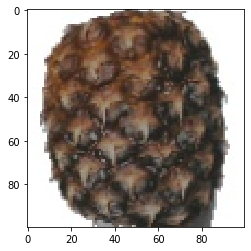

In [26]:
plt.imshow(X_train_raw[1])

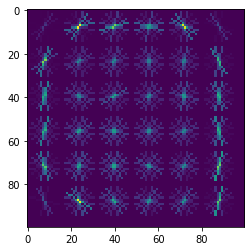

In [27]:
plt.imshow(hog_images_train[1])

Accuracy with SVM: 100.00%


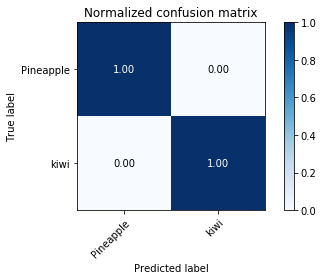

In [28]:
# linear SVM using hog features
svm=SVC(gamma='auto',kernel='linear',probability=True)
svm.fit(X_train_hog,y_train)
y_pred=svm.predict(X_test_hog)

# Evaluation
precision=metrics.accuracy_score(y_pred,y_test)*100
print("Accuracy with SVM: {0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,y_pred,classes=y_train,normalize=True,title="Normalized confusion matrix")
plt.show()

# calculate FPR and TPR
probs=svm.predict_proba(X_test_hog)
probs=probs[:,1]
svm_fpr,svm_tpr,thresholds=metrics.roc_curve(y_test,probs)
svm_auc=metrics.roc_auc_score(y_test,probs)

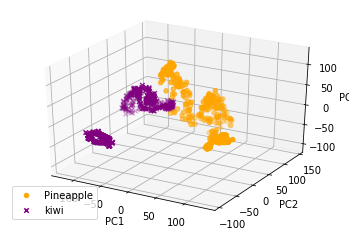

In [29]:
# 使用PCA提取特征
pca = PCA(n_components=3)
dataIn3D = pca.fit_transform(X_train)
plotPrincipalComponents(dataIn3D, 3)

In [30]:
# 展示PCA内部细节的模块
def showPCA(image,X2, X10, X50):
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(1,4,1)
    ax1.axis('off')
    ax1.set_title('Original image')
    plt.imshow(image)
    ax1 = fig.add_subplot(1,4,2)
    ax1.axis('off') 
    ax1.set_title('50 PC')
    plt.imshow(X50)
    ax1 = fig.add_subplot(1,4,3)
    ax1.axis('off') 
    ax1.set_title('10 PC')
    plt.imshow(X10)
    ax2 = fig.add_subplot(1,4,4)
    ax2.axis('off') 
    ax2.set_title('2 PC')
    plt.imshow(X2)
    plt.show()

def computePCA(n, im_scaled, image_id):
    pca = PCA(n)
    principalComponents = pca.fit_transform(im_scaled)
    im_reduced = pca.inverse_transform(principalComponents)
    newImage = scaler.inverse_transform(im_reduced[image_id])
    return newImage

def showVariance(X_train):
    #Compute manually the principal components
    cov_matr=np.dot(X_train, X_train.T)
    eigval,eigvect=np.linalg.eig(cov_matr)

    index=np.argsort(eigval)[::-1] #take in order the index of ordered vector (ascending order)

    #eigvect[:,i] is associated to eigval[i] so 
    eigvect=eigvect[:,index]
    eigval=eigval[index]

    n_PC=[]
    var_explained=[]
    var_temp=[]
    var_tmp=0
    for i in range(10):
        var_tmp=var_tmp+eigval[i]
        n_PC.append(i)
        var_temp.append(eigval[i]/(eigval.sum())*100)
        var_explained.append(var_tmp/(eigval.sum())*100)

    fig, ax = plt.subplots(figsize=(8,8))

    ind = np.arange(10)    
    width = 0.35         # the width of the bars
    p1 = ax.bar(ind, var_temp, width, color='orange')
    p2 = ax.bar(ind + width, var_explained, width, color='blue')

    ax.legend((p1[0], p2[0]), ('Individual explained variance', 'Cumulative explained variance'))

    ax.set_title('Variance explained using PCs')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))

    plt.xlabel('Number of PC')
    plt.ylabel('Variance exaplained in %')

    ax.autoscale_view()

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


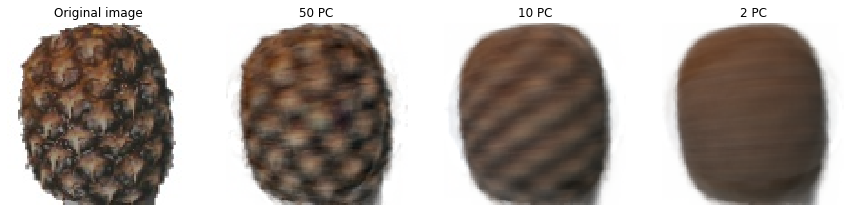

In [32]:
image_id = 2
image = X_train_raw[image_id]

#Compute PCA
X_2 = computePCA(2, X_train,image_id)
X_10 = computePCA(10, X_train,image_id)
X_50 = computePCA(50, X_train,image_id)

#Reshape in order to plot images
X2 = np.reshape(X_2, (dim,dim,3)).astype(int)
X10 = np.reshape(X_10, (dim,dim,3)).astype(int)
X50 = np.reshape(X_50, (dim,dim,3)).astype(int)

#Plot
showPCA(image, X2, X10, X50)

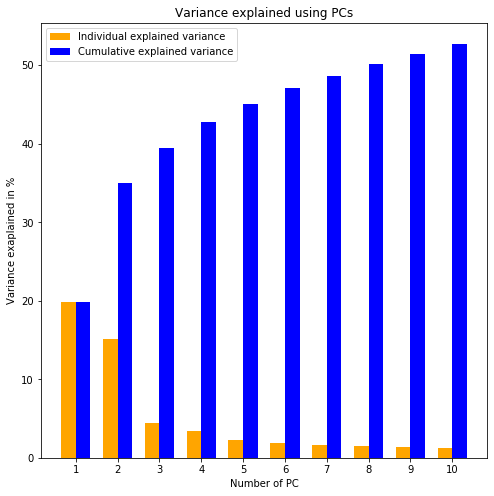

In [33]:
showVariance(X_train)

Accuracy with SVM: 100.00%


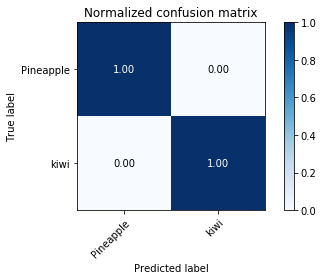

In [34]:
# SVM modely
svm=SVC(gamma='auto',kernel='linear',probability=True)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

# Evaluation
precision=metrics.accuracy_score(y_pred,y_test)*100
print("Accuracy with SVM: {0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,y_pred,classes=y_train,normalize=True,title="Normalized confusion matrix")
plt.show()

# calculate FPR and TPR
probs=svm.predict_proba(X_test)
probs=probs[:,1]
svm_fpr,svm_tpr,thresholds=metrics.roc_curve(y_test,probs)
svm_auc=metrics.roc_auc_score(y_test,probs)

In [35]:
pred_kfold=cross_val_score(svm,X,y,cv=5)
print("Accuracy with SVM and K-FOLD cross validation: %0.2f"%(pred_kfold.mean()))

Accuracy with SVM and K-FOLD cross validation: 0.99


Accuracy with SVM considering only first 2PC: 98.14%


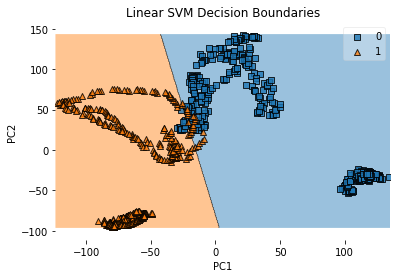

In [36]:
pca = PCA(n_components=2)
X_train2D = pca.fit_transform(X_train)
X_test2D = pca.fit_transform(X_test)

svm.fit(X_train2D, y_train) 
test_predictions = svm.predict(X_test2D)
precision = metrics.accuracy_score(test_predictions, y_test) * 100
print("Accuracy with SVM considering only first 2PC: {0:.2f}%".format(precision))

#Plotting decision boundaries
plot_decision_regions(X_train2D, y_train, clf=svm, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Linear SVM Decision Boundaries')
plt.show()

Accuracy with Not-Linear SVM considering only first 2PC: 64.91%


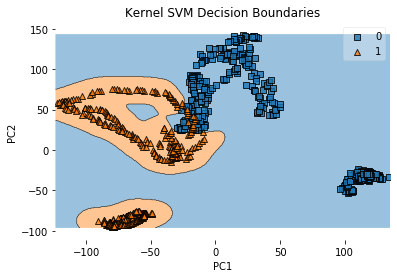

In [37]:
svm_with_kernel = SVC(gamma=0.01, kernel='rbf', probability=True)
svm_with_kernel.fit(X_train2D, y_train) 
y_pred = svm_with_kernel.predict(X_test2D)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Not-Linear SVM considering only first 2PC: {0:.2f}%".format(precision))

#Plotting decision boundaries
plot_decision_regions(X_train2D, y_train, clf=svm_with_kernel, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kernel SVM Decision Boundaries')
plt.show()

Accuracy with Not-Linear SVM considering only first 2PC: 64.91%


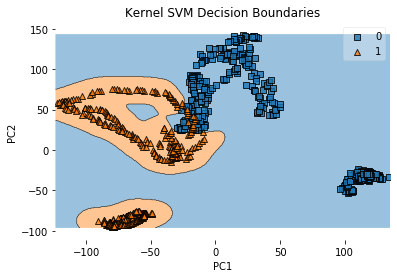

In [38]:
# kernel SVM+PCA
svm_with_kernel = SVC(gamma=0.01, kernel='rbf', probability=True)
svm_with_kernel.fit(X_train2D, y_train) 
y_pred = svm_with_kernel.predict(X_test2D)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Not-Linear SVM considering only first 2PC: {0:.2f}%".format(precision))

#Plotting decision boundaries
plot_decision_regions(X_train2D, y_train, clf=svm_with_kernel, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kernel SVM Decision Boundaries')
plt.show()

Accuracy with K-NN: 99.69%


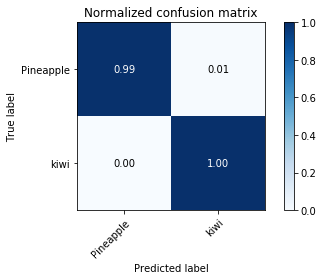

In [39]:
# knn
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with K-NN: {0:.2f}%".format(precision))
cm , _ = plot_confusion_matrix(y_test, y_pred, classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()

# calculate the FPR and TPR for all thresholds of the classification
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
knn_fpr, knn_tpr, thresholds = metrics.roc_curve(y_test, probs)
knn_auc = metrics.roc_auc_score(y_test, probs)

In [41]:
#KNN + K-FOLD
pred_kfold = cross_val_score(knn, X, y, cv=5) 
print("Accuracy with K-NN and K-FOLD CROSS VALIDATION: %0.2f " % (pred_kfold.mean()))

Accuracy with K-NN and K-FOLD CROSS VALIDATION: 0.97 


Accuracy with K-NN considering only first 2PC: 98.14%


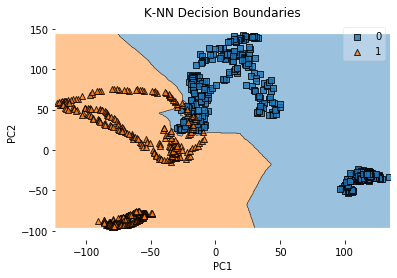

In [43]:
#K-NN + PCA
knn.fit(X_train2D, y_train)
y_pred = knn.predict(X_test2D)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with K-NN considering only first 2PC: {0:.2f}%".format(precision))

#Plotting decision boundaries
plot_decision_regions(X_train2D, y_train, clf=knn, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-NN Decision Boundaries')
plt.show()

Accuracy with Decision Tree: 97.52%


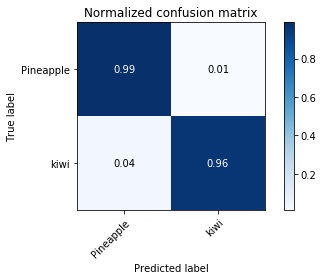

In [44]:
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Decision Tree: {0:.2f}%".format(precision))
cm , _ = plot_confusion_matrix(y_test, y_pred, classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()

# calculate the FPR and TPR for all thresholds of the classification
probs = tree.predict_proba(X_test)
probs = probs[:, 1]
tree_fpr, tree_tpr, thresholds = metrics.roc_curve(y_test, probs)
tree_auc = metrics.roc_auc_score(y_test, probs)

In [45]:
#DECISION TREE + K-FOLD
pred_kfold = cross_val_score(tree, X, y, cv=5) 
print("Accuracy with DECISION TREE and K-FOLD CROSS VALIDATION: %0.2f" % (pred_kfold.mean()))

Accuracy with DECISION TREE and K-FOLD CROSS VALIDATION: 0.95


Accuracy with Decision Tree considering only first 2PC: 97.52%


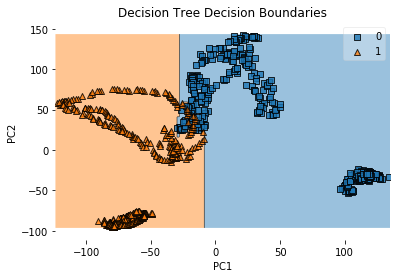

In [47]:
#DECISION TREE + PCA
tree = tree.fit(X_train2D,y_train)
y_pred = tree.predict(X_test2D)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Decision Tree considering only first 2PC: {0:.2f}%".format(precision))

#Plotting decision boundaries
plot_decision_regions(X_train2D, y_train, clf=tree, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Tree Decision Boundaries')
plt.show()